<h2 align=center> Classify Radio Signals from Outer Space with Keras</h2>

![](Allen_Telescope.jpg)
[Allen Telescope Array](https://flickr.com/photos/93452909@N00/5656086917) by [brewbooks](https://www.flickr.com/people/93452909@N00) is licensed under [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)

## Task 1: Import Libraries

### Dataset link and model.h5 link for future reference


https://drive.proton.me/urls/HAYZ4RZAPW#TgVh013EHXjQ

In [1]:
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.9.0


## Task 2: Load and Preprocess SETI Data

In [2]:
train_images = pd.read_csv('/Users/gauravmehta/Projects/Collection-of-Projects/13. Classify Signals from Outer Space/dataset/train/images.csv', header = None)
train_labels = pd.read_csv('/Users/gauravmehta/Projects/Collection-of-Projects/13. Classify Signals from Outer Space/dataset/train/labels.csv', header = None)
val_images = pd.read_csv('/Users/gauravmehta/Projects/Collection-of-Projects/13. Classify Signals from Outer Space/dataset/validation/images.csv', header = None)
val_labels = pd.read_csv('/Users/gauravmehta/Projects/Collection-of-Projects/13. Classify Signals from Outer Space/dataset/validation/labels.csv', header = None)

In [3]:
train_images.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510


In [4]:
train_labels.head(3)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0


In [5]:
print("Training set shape: ", train_images.shape, train_labels.shape)
print("Validation set shape: ", val_images.shape, val_labels.shape)

Training set shape:  (3200, 8192) (3200, 4)
Validation set shape:  (800, 8192) (800, 4)


In [6]:
x_train = train_images.values.reshape(3200, 64, 128, 1)
x_val = val_images.values.reshape(800, 64, 128, 1)

y_train = train_labels.values
y_val = val_labels.values

## Task 3: Plot 2D Spectrograms

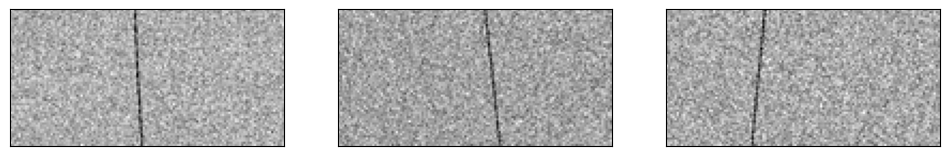

In [7]:
plt.figure(0, figsize = (12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(x_train[np.random.randint(0,x_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = 'gray')

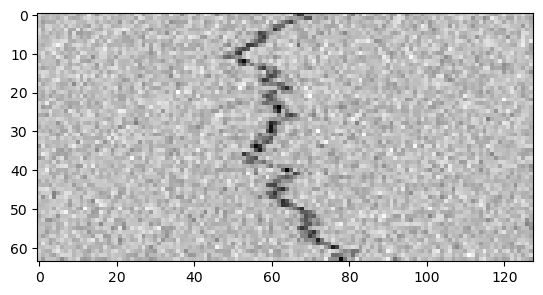

In [8]:
plt.imshow(np.squeeze(x_train[3]), cmap = 'gray')

## Task 4: Create Training and Validation Data Generators

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(horizontal_flip = True)

In [10]:
ImageDataGenerator?

Init signature:
ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,
)
Docstring:     
Generate batches of tensor image data with real-time data augmentation.

Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
recommended for new code. Prefer loading images with
`tf.keras.utils.image_dataset_from_directory` and transforming the output
`tf.data.Dataset` with preprocessing layers. For more information, see the
tutoria

In [11]:
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)

## Task 5: Creating the CNN Model

In [12]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
# Initialising the CNN
model = Sequential()
# 1st Convolution
model.add(Conv2D(32,(5,5),padding='same', input_shape = (64,128,1))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5),padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())
# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))


model.add(Dense(4, activation = 'softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-02 12:30:56.805411: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-02 12:30:56.805877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Task 6: Learning Rate Scheduling and Compile the Model

In [14]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True
)

optimizer = Adam(learning_rate=lr_schedule)

In [15]:
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 32)       832       
                                                                 
 batch_normalization (BatchN  (None, 64, 128, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 64, 64)        5

## Task 7: Training the Model

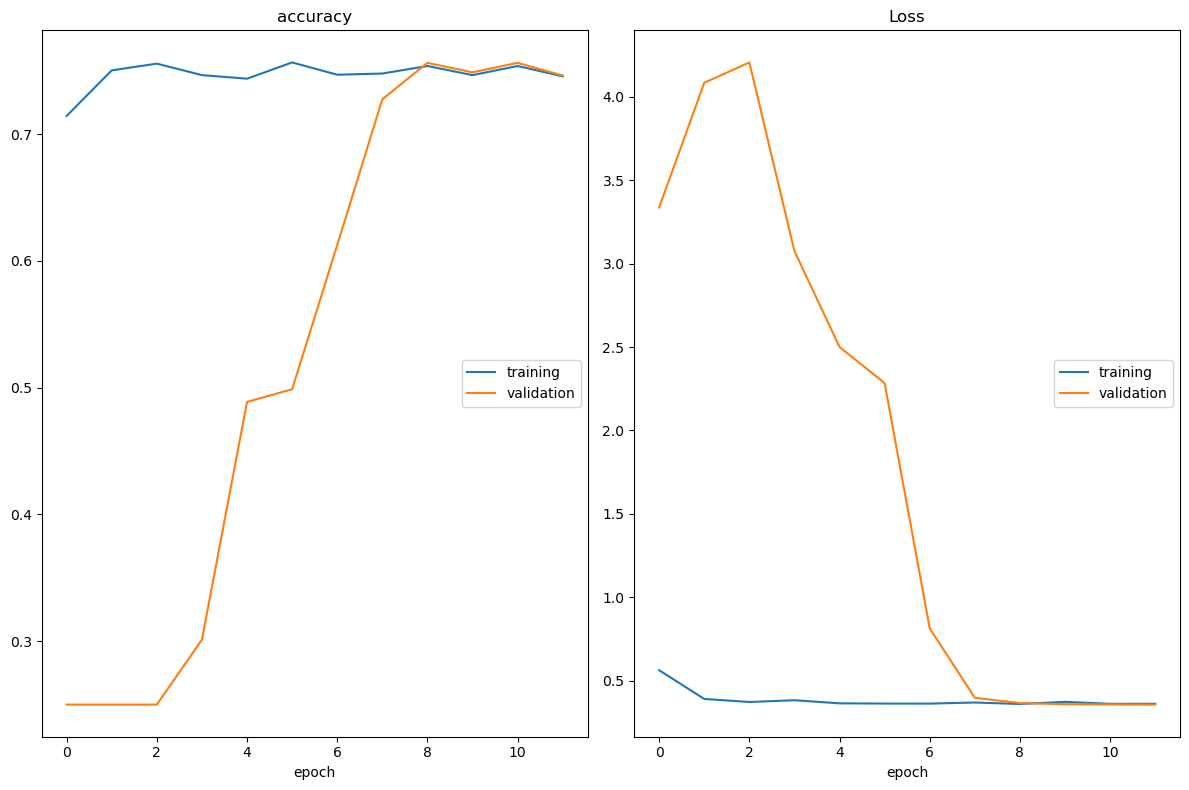

accuracy
	training         	 (min:    0.714, max:    0.757, cur:    0.746)
	validation       	 (min:    0.250, max:    0.756, cur:    0.746)
Loss
	training         	 (min:    0.361, max:    0.563, cur:    0.362)
	validation       	 (min:    0.357, max:    4.205, cur:    0.357)
100/100 [==============================] - 10s 103ms/step - loss: 0.3622 - accuracy: 0.7456 - val_loss: 0.3572 - val_accuracy: 0.7462


In [16]:
checkpoint = ModelCheckpoint('model_weight.h5', monitor='val_loss',
                             save_weights_only=True, mode='min', verbose=0)
callbacks = [PlotLossesCallback(), checkpoint]

batch_size = 32

history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle= True),
    steps_per_epoch = len(x_train) // batch_size,
    validation_data = datagen_val.flow(x_val,y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val) // batch_size,
    epochs=12,
    callbacks=callbacks
)

## Task 8: Model Evaluation

In [17]:
model.evaluate(x_val,y_val)

25/25 [==============================] - 1s 22ms/step - loss: 0.3573 - accuracy: 0.7487


[0.3572843372821808, 0.7487499713897705]

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val,1)
y_pred = np.argmax(model.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))

 5/25 [=====>........................] - ETA: 0s

2023-03-02 12:36:23.830011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.50      0.34      0.40       200
           2       0.50      0.67      0.57       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.74       800
weighted avg       0.75      0.75      0.74       800



In [19]:
print("Classification accuracy : %0.6f" % metrics.accuracy_score(y_true, y_pred))

Classification accuracy : 0.748750


In [21]:
# labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
